In [1]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('proyecto_tweets_sample_anonimizados.csv',encoding='iso-8859-3',encoding_errors='replace',sep=';')

# Mostrar las primeras filas del dataframe para entender cómo se ven los datos
print(df.head())



   Column1    user_id    status_id        created_at is_retweet is_quote  \
0        0   user1681  tweet164722  24-10-2019 23:28      FALSO    FALSO   
1        1   user1681  tweet142612   23-10-2019 2:27      FALSO    FALSO   
2        2   user1681  tweet142889   23-10-2019 2:43      FALSO    FALSO   
3        3  user11284  tweet114988  21-10-2019 18:55      FALSO    FALSO   
4        4  user11284   tweet28901  11-10-2019 13:04      FALSO    FALSO   

  is_reply lang                                               text  \
0    FALSO   es  @sebastianpinera el país se aburrió de ti y tu...   
1    FALSO   es          Lo están borrando https://t.co/QCE7c1dWSb   
2    FALSO   es          Lo están borrando https://t.co/bAAkjDMhaX   
3    FALSO   es  Augusto PIÑECHET...es el nuevo nombre que la p...   
4    FALSO   es  Después de un año con licencias médicas, compr...   

   created_at_int  hora  dia  
0       201910240    23    5  
1       201910230     2    4  
2       201910230     2    4 

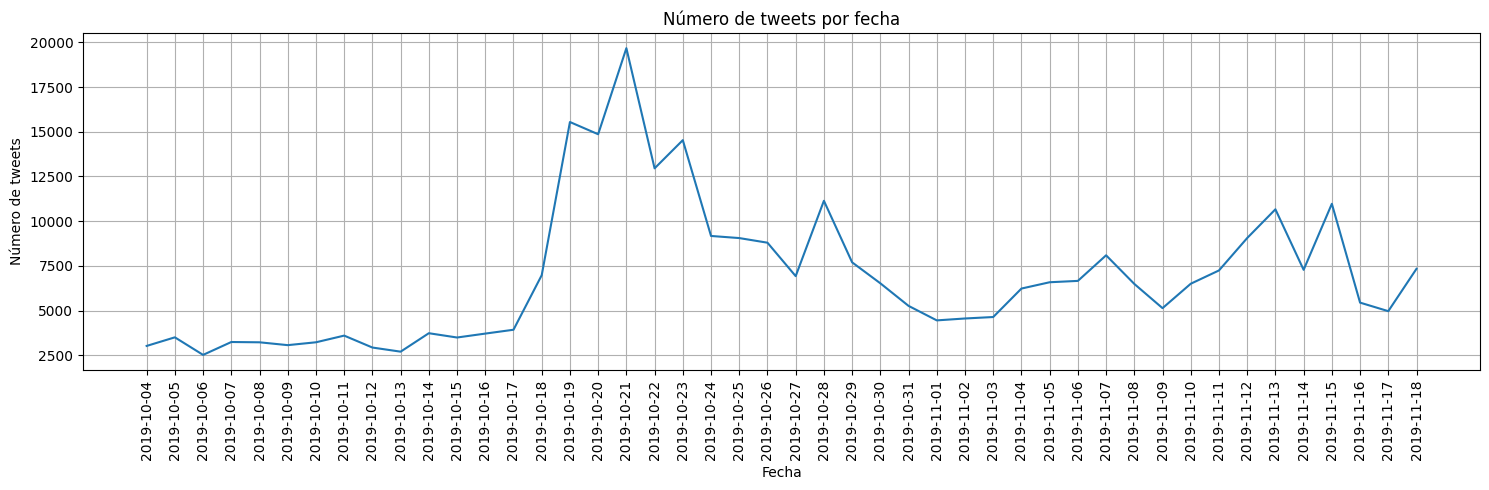

In [2]:
import matplotlib.pyplot as plt
# Convertir la columna 'created_at' a tipo datetime
df['created_at'] = pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M')

# Agrupar por fecha y contar los tweets
tweets_por_dia = df.groupby(df['created_at'].dt.date).size()

# Graficar
plt.figure(figsize=(15, 5))
tweets_por_dia.plot(kind='line')
plt.title('Número de tweets por fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de tweets')
plt.grid(True)

# Ajustar los ticks del eje X para que muestren todos los días
plt.xticks(pd.date_range(start=tweets_por_dia.index.min(), end=tweets_por_dia.index.max(), freq='D'), rotation=90)

plt.tight_layout()  # Ajusta automáticamente los parámetros de la figura para dar espacio a las etiquetas
plt.show()

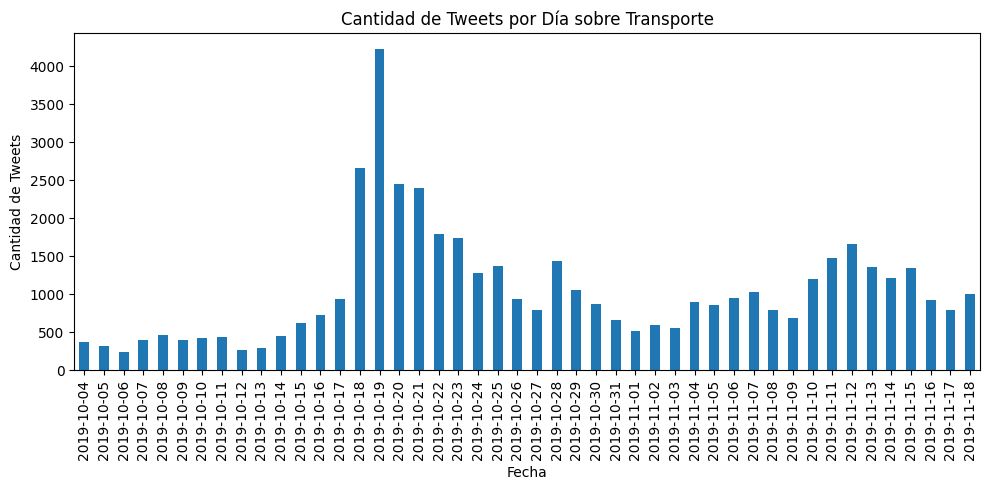

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# Lista de palabras clave relacionadas con el transporte

palabras_clave = [
    'transporte', 'transantiago', 'metro', 'bencina', 'combustible', 'tren', 'bus', 
    'colectivo', 'taxi', 'subida', 'alza', 'precio', 'costo', 'auto', 'automovil', 
    'locomoción', 'pesos', 'peso', 'tag', 'evasion', 'tarifa', 'pasaje', 
    'estación', 'corte', 'aumento', 'diesel', 'tránsito', 'congestión', 'acera', 
    'peaje', 'ciclovía', 'bicicleta', 'micro', 'bip', 'tarjeta bip', 'viaje', 'ruta'
]

# Palabras clave adicionales
palabras_clave_adicionales = [
    'viaje', 'ruta', 'conductor', 'pasajero', 'transito', 'desvío', 'obstrucción', 'embotellamiento', 
    'tarjeta bip', 'pase escolar', 'tarifa estudiantil', 
    'zona paga', 'parada', 'terminal', 
    'ministerio de transportes',
    'vía exclusiva', 'carril', 'peatón', 'peatonal', 'vehicular', 'calzada',
    'ley de tránsito', 'regulación',
    'vehículo eléctrico'
]
palabras_clave_adicionales_2 = [
    'vehiculo', 'taxibús', 'ruta', 'aeropuerto', 'puerto', 
    'retraso', 'demora', 
    'ferrocarril', 'intermodal', 'metrobus', 'ruta', 
    'tráfico', 'flota', 'choque', 'colisión',
    'ruta alternativa', 'trolebus', 'ciclista', 
    'moto', 'scooter', 'aplicación de transporte', 
    'Uber', 'Cabify', 'Beat', 'Didi', 'estacionamiento', 'parquímetro', 'zona azul', 
    'tarifa diferenciada', 'hora punta', 'hora valle', 'boleto',
    'evasor', 'vial', 'evasión'
    'atropello', 'peatonal', 'cruce', 'semáforo', 'señalética', 'viaje', 
    'carril', 'via', 'tráfico', 
    'tránsito', 'vehicular',
    'transitabilidad', 'movilidad', 'vial',
    'bicisenda', 'transporte', 'parada', 'parada', 'combi'
]

palabras_clave_adicionales_3 = [
    'micro', 'liebre', 'colectivo', 'furgón', 'cleta', 'bici', 'transantiago',
    'oruga', 'troncal', 'microbusero', 'tacógrafo', 'línea'
    'asalto en micro', 'corte de calle', 'toma de calle', 'bajada', 
    'convoy',
    'control de identidad', 'bip!', 'pase', 'acoso en transporte', 'trole', 'taxista', 
    'carril exclusivo','transantiago', 
    'saldo',  
    'cambio de recorrido', 'paradero fantasma', 'tarifaria', 'tarifa',
    'red','encerrona', 
    'evasión',
    'topón', 'bus de acercamiento'
]

# Combinar ambas listas y eliminar duplicados
palabras_clave = list(set(palabras_clave + palabras_clave_adicionales + palabras_clave_adicionales_2))


# Filtrar los tweets que contienen alguna de las palabras clave
filtro = df['text'].str.contains('|'.join(palabras_clave), case=False, na=False)
tweets_filtrados = df[filtro].copy()  # Usar copy aquí para evitar warnings

# Convertir la columna 'created_at' a datetime y extraer solo la fecha
tweets_filtrados['fecha'] = pd.to_datetime(tweets_filtrados['created_at'], dayfirst=True).dt.date

# Agrupar por fecha y contar los tweets
tweets_por_dia = tweets_filtrados.groupby('fecha').size()

# Gráfico de la cantidad de tweets por día
plt.figure(figsize=(10, 5))
tweets_por_dia.plot(kind='bar')
plt.title('Cantidad de Tweets por Día sobre Transporte')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
